<a href="https://colab.research.google.com/github/PriscillaMuli/Actuarial-Medical-Insurance-Python-Analysis/blob/main/Actuarial_Medical_Insurance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actuarial Medical Insurance Dataset Analysis**

**1.1 Defining the Question**

The objective of this project is the analysis of claim amounts for policyholders based on an insurance dataset, considering certain important variables such as BMI which affect the claim amount for individual policyholders.

**1.2 Defining the Metric for Success**

Metric of success for this project is the successful analysis of factors that affect premium amount per policyholder from the data provided.




**1.3 Context Understanding**

This dataset is a health insurance dataset on insurance charges individuals paid in different regions to cover the medical insurance charges incurred. The dataset is reliable, relevant and objective and was sourced from a reputable website.  It is a good dataset for underwriting purposes and the study was conducted to deduce how the data analysis affects the premium amount.

**1.4 Recording the Experimental Design**

The following are the steps we are going to follow:

1. Data importation - loading the dataset with appropriate libraries to use

2. Data Cleaning - do the needed steps to clean the data

3. Exploratory Data Analysis - univariate and bivariate data analysis

4. Modelling - utilize selected models of choice for the process

5. Evaluation and recommendations - comment on each tested model's suitability in solving the problem

6. Conclusion - final remarks on the project

**1.5 Data Relevance**

The data provided was found to be suitable for this data analysis considering the question given. This is especially because insurance charges are given as well as each of the policyholder's attributes.

**Importing Libraries**

In [7]:
# Importing the necessary libraries required for our analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

#**2. Data Importation**

In [5]:
#install pandas profiling
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.5 MB/s 
     |████████████████████████████████| 11.1 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 65.6 MB/s 
     |████████████████████████████████| 102 kB 47.9 MB/s 
     |████████████████████████████████| 690 kB 58.1 MB/s 
     |████████████████████████████████| 4.7 MB 46.3 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 812 kB 54.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=277ba9f3ae0411c2c7caf3a41d7ee9d031b3346c50f99efd8707bd4e806f2ead
  Stored in directory: /tmp/pip-ephem-wheel-cache-4expnbfs/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098

# **2.1 Reading the dataset and creating a dataframe for the dataset**

#**2.1.1. Creating a dataframe from our datasets**

In [11]:
# Previewing the first entries of the dataframe

insurance_df = pd.read_csv("insurance.csv")
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Gives the total number of rows and columns in the dataset
insurance_df.shape

(1338, 7)

In [ ]:
# Gives a summary of vital descriptive statistics of the dataset
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Gives a summary of vital information on the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Checking the different datatypes present in the data
insurance_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [ ]:
# Checking out individual columns of the dataset

insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#**3. Profile Report Overview of the Data**

In [12]:
# Profile report overview of dataset 
# Summarizing correlations and interactions for the the medical insurance claim amount data
report = pp.ProfileReport(insurance_df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#**4.Data Cleaning**

#**4.1 Outliers**

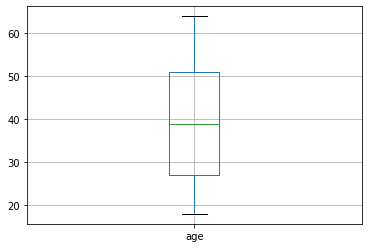

In [ ]:
# Check for outliers in specific 'age' column by plotting a boxplot of the variable
# There are not found any outliers in the 'age' column as shown in the boxplot

insurance_df.boxplot(column = 'age')

In [ ]:
# Function to get the number of outliers in specific 'age' column
# For outliers in the 'age' column, 0 outliers are found as specified in the output below

outliers=[]

def detect_outlier(insurance_df):
    
    threshold=3
    mean_1 = np.mean(insurance_df)
    std_1 =np.std(insurance_df)
    
    for y in insurance_df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

len(detect_outlier(insurance_df['age']))

0

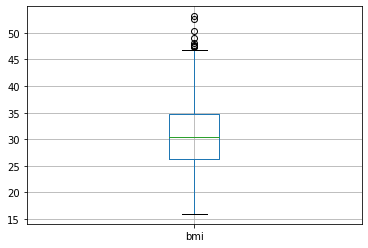

In [ ]:
# Check for outliers in 'bmi' column
# There are found outliers from B.M.I. of 47 onwards and none below 47 and these outliers need to be dropped
insurance_df.boxplot(column = 'bmi')

In [ ]:
# Function to get the number of outliers in specific BMI column
# For outliers in the 'bmi' column, 4 outliers are found as specified in the output below
outliers=[]

def detect_outlier(insurance_df):
    
    threshold=3
    mean_1 = np.mean(insurance_df)
    std_1 =np.std(insurance_df)
    
    for y in insurance_df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

len(detect_outlier(insurance_df['bmi']))

4

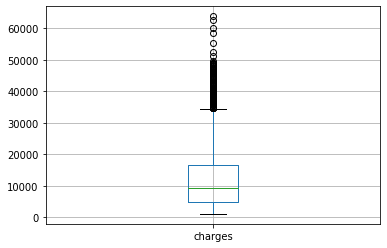

In [ ]:
# Check for outliers in 'charges' column
insurance_df.boxplot(column = 'charges')

In [ ]:
# Function to get the number of outliers in specific 'charges' column
# For outliers in the 'charges' column, 7 outliers are found as specified in the output below

outliers=[]

def detect_outlier(insurance_df):
    
    threshold=3
    mean_1 = np.mean(insurance_df)
    std_1 =np.std(insurance_df)
    
    for y in insurance_df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

len(detect_outlier(insurance_df['charges']))

7

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


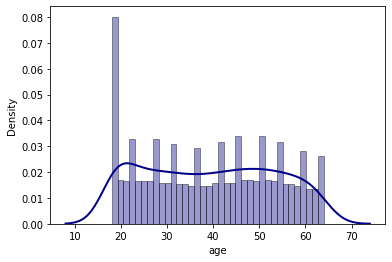

In [ ]:
# Density Plot and histogram distribution of ages of respondents
sns.distplot(insurance_df['age'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

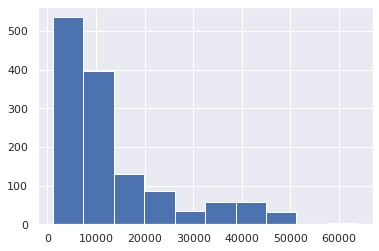

In [ ]:
# Distribution of insurance charges
insurance_df['charges'].hist()

In [ ]:
# Removing the outliers and anomalies in dataset
# Get the Interquartile range
Q1 = insurance_df.quantile(0.25)
Q3 = insurance_df.quantile(0.75)
IQR = Q3 - Q1
newdf = insurance_df[~((insurance_df < (Q1 - 1.5 * IQR)) | (insurance_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(newdf.shape)
print(insurance_df.shape)

(1193, 7)
(1338, 7)


In [ ]:
# Preview new dataframe of the original medical insurance dataset with dropped outliers and anomalies
newdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Check for missing data
newdf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# The data is sufficient for exploration since anomalies,Outliers and NA values are absent
# Save data file
newdf.to_csv('Medical Insurance Dataset.csv')

#**4.2 Exploratory Data Analysis**

#**4.2.1 Analysis of Individual Columns**




In [ ]:
# Preview the first four entries of the column
ages = newdf['age']
ages.head()

0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64

In [ ]:
# Describe the column
newdf['age'].describe()

count    1193.000000
mean       38.981559
std        14.063482
min        18.000000
25%        26.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
# Determine median of age in the US medical insurance dataset
# the median age of the dataset is 39 years of age
np.median(newdf['age'])

39.0

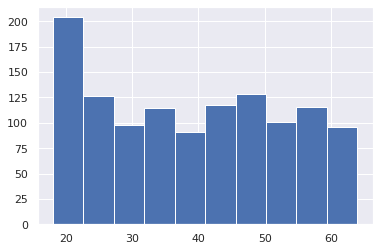

In [ ]:
#A histogram representing age column
newdf['age'].hist()

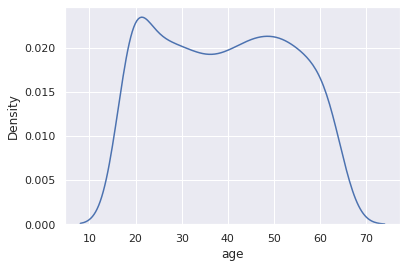

In [ ]:
# Plotting a graph that shows density of ages from the insurance dataset
newdf = sns.kdeplot(insurance_df['age'])
plt.show()

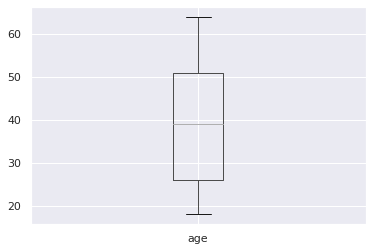

In [ ]:
# Univariate EDA : box plot of age column
newdf.boxplot(column = 'age')

In [ ]:
smoker=newdf['smoker']
smoker.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


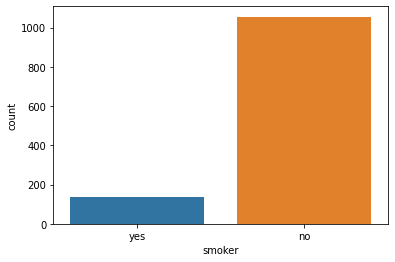

In [ ]:
sns.countplot(newdf['smoker'])

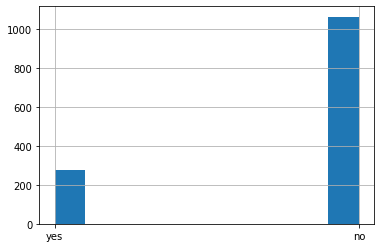

In [ ]:
#A histogram representing the smoker status of individuals.
# From the histogram it is visible that majority of bmi points range between 20 to 40
insurance_df['smoker'].hist()

In [ ]:
#A histogram representing age column
newdf['smoker'].hist()

In [ ]:
smoker.value_counts()

no     1055
yes     138
Name: smoker, dtype: int64

In [ ]:
smoker.value_counts()['no']/smoker.value_counts()['yes']
#Result differs from correct one

7.644927536231884

In [ ]:
#Preview the first entries of the column
charges = newdf['charges']
charges.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Describe the column
newdf['charges'].describe()

count     1193.000000
mean      9942.269682
std       7251.326564
min       1121.873900
25%       4415.158800
50%       8410.046850
75%      12979.358000
max      34472.841000
Name: charges, dtype: float64

In [ ]:
# Determine median of charges in the data
# From the output of the median of the charges, it is estimated the middle observation is US8,410$ 
np.median(newdf['charges'])

8410.04685

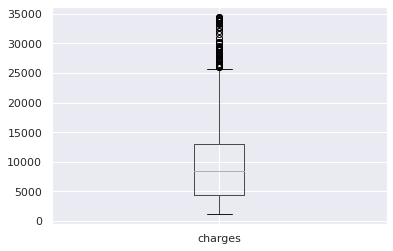

In [ ]:
# More Univariate EDA on charges category
newdf.boxplot(column = 'charges')

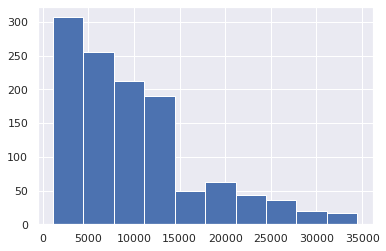

In [ ]:
#A histogram representing the charges.
# From the histogram it is visible that majority of charges are below 10,000 in the US insurance dataset
newdf['charges'].hist()

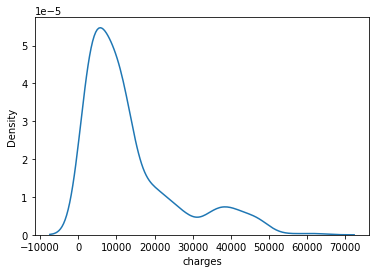

In [ ]:
# Plotting a graph that shows density of ages from the insurance dataset
newdf = sns.kdeplot(insurance_df['charges'])
plt.show()

In [ ]:
#Preview the first entries of the column
bmi = newdf['bmi']
bmi.head()

0    27.900
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64

In [ ]:
# Describe the column
newdf['bmi'].describe()

count    1193.000000
mean       29.998529
std         5.866873
min        15.960000
25%        25.800000
50%        29.735000
75%        33.770000
max        46.750000
Name: bmi, dtype: float64

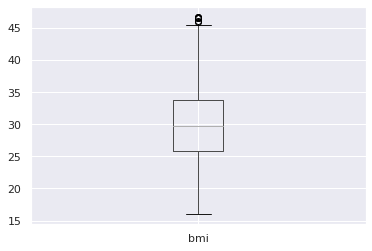

In [ ]:
#Now to Univariate EDA
newdf.boxplot(column = 'bmi')

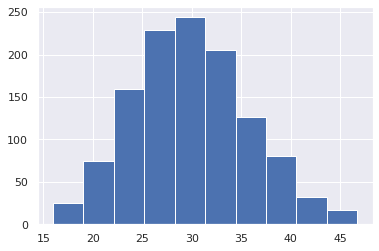

In [ ]:
#A histogram representing the bmi.
# From the histogram it is visible that majority of bmi points range between 20 to 40
newdf['bmi'].hist()

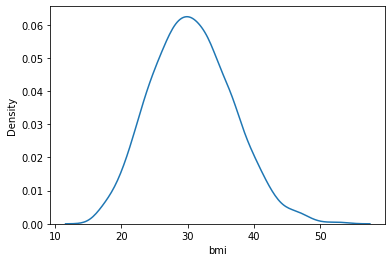

In [ ]:
# Plotting a graph that shows density of bmi from the insurance dataset
newdf = sns.kdeplot(insurance_df['bmi'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


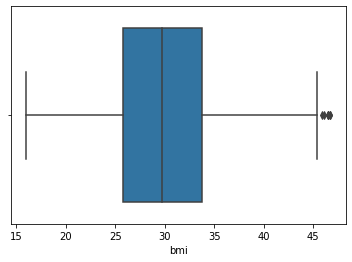

In [ ]:
sns.boxplot(bmi)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


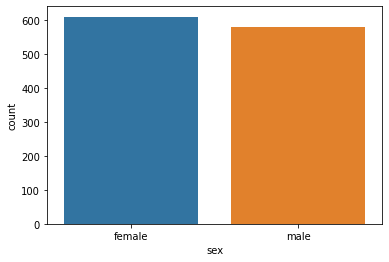

In [ ]:
sns.countplot(newdf['sex'])
# Plotting a countplot of the sex column 
# Female numbers are more than males

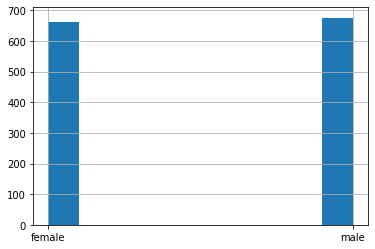

In [ ]:
#A histogram representing the bmi.
# From the histogram it is visible that majority of bmi points range between 20 to 40
insurance_df['sex'].hist()

In [ ]:
children = newdf[['children']]
children.head()
# This code previews the first 4 columns of the children category

,children
0,0
1,1
2,3
3,0
4,0


In [ ]:
children.describe()
# The code gives the count, mean, standard deviation, minimum, maximum and 1st, 2nd and 3rd quartiles of the children column

,children
count,1193.000000
mean,1.085499
std,1.216249
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


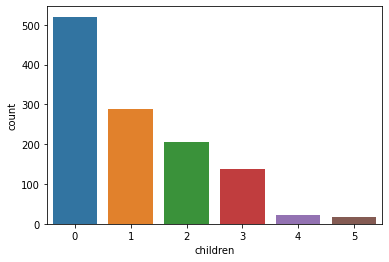

In [ ]:
sns.countplot(newdf['children'])
# Plotting a countplot of the children's column category

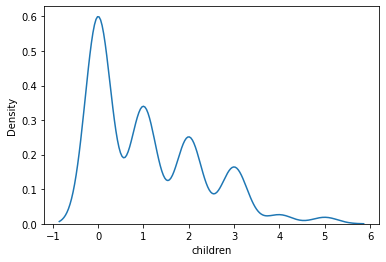

In [ ]:
# Plotting a graph that shows density of bmi from the insurance dataset
newdf = sns.kdeplot(insurance_df['children'])
plt.show()

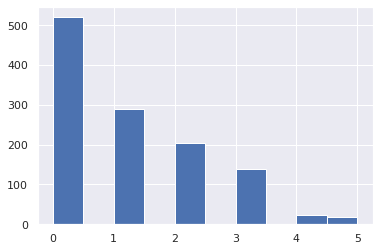

In [ ]:
#A histogram representing the bmi.
# From the histogram it is visible that majority of bmi points range between 20 to 40
newdf['children'].hist()

In [ ]:
np.median(children)
# The median number of children is 1

1.0

In [ ]:
children.value_counts()

children
0           520
1           289
2           205
3           138
4            23
5            18
dtype: int64

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#**5. Questions Answered**

#**5.1 Question 1: Total number of insured past the age of 64?**

In [ ]:
# How many of the insured have the age of 64?  
df = insurance_df[insurance_df['age'] == insurance_df['age'].max()]
print(insurance_df.head())
print()
print(f'Total number of insured people with the age of 64: {len(df)}.')

   age   sex     bmi  children smoker region      charges
0   19  None  27.900         0   None   None  16884.92400
1   18  None  33.770         1   None   None   1725.55230
2   28  None  33.000         3   None   None   4449.46200
3   33  None  22.705         0   None   None  21984.47061
4   32  None  28.880         0   None   None   3866.85520

Total number of insured people with the age of 64: 22.


#**5.2 Question 2: Highest charges are paid by which category?**

In [ ]:
newdf['charges'].describe()

count     1193.000000
mean      9942.269682
std       7251.326564
min       1121.873900
25%       4415.158800
50%       8410.046850
75%      12979.358000
max      34472.841000
Name: charges, dtype: float64

In [ ]:
# The result below shows the highest charges paid is 63,770.42801
insurance_df[insurance_df['charges'] == insurance_df['charges'].max()]


,age,sex,bmi,children,smoker,region,charges
543,54,None,47.41,0,None,None,63770.42801


#**5.3 Question 3 : Do smokers pay higher charges than non-smokers?**

In [ ]:
insurance_df['charges'].groupby(insurance_df['smoker']).mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

#**5.4 Question 4: Policyholder with the highest BMI?**

In [ ]:
insurance_df[insurance_df['bmi'] == insurance_df['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [ ]:
insurance_df['charges'].mean(), insurance_df['charges'].median()

(13270.422265141257, 9382.033)

**Observation: The highest BMI is displayed from an 18 year old male who is not a smoker.**